In [2]:
%load_ext autoreload
%autoreload 2

In [35]:
import logging
from copy import deepcopy

from linux_qm.qm.config import *
from linux_qm.src.util import *
from linux_qm.qm.xtb import XTBDriver

import rdkit
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw.IPythonConsole import drawMol3D

IPythonConsole.molSize = 600,600
logging.getLogger().setLevel(logging.DEBUG)

In [4]:
os.chdir('/home/ergot/linux_qm/notebooks')

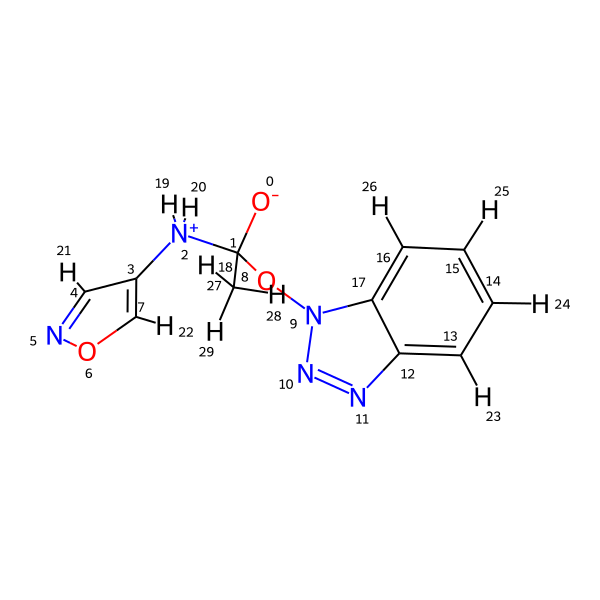

In [63]:
smi = '[O-]C([NH2+]c1cnoc1)(On1nnc2ccccc12)C'
smi = '[O-]C([NH2+]c1cnoc1)(On1nnc2ccccc12)C'
mol = load_smiles3D(smi, seed=0, opt=True)
mol

In [84]:
# mol = load_smiles3D('[O-]C([NH2+]c1ccnc2ccnn12)(On1nnc2ccccc12)C1(F)CC1', opt=True)
# smi = 'CBr'
# mol = load_smiles3D(smi, opt=True)

# smi = 'Cc1ccc(Br)cc1C([O-])([NH2+]c1cccc(Br)c1F)On1nnc2ccccc12' # low yield
# smi = 'COCC(C)[NH2+]C([O-])(On1nnc2ccccc12)c1ccc(cc1)C(=O)OC(C)(C)C' # low yield
# smi = 'COC(=O)C1CCC(CC1)C([O-])([NH2+]C1(C)COC1)On1nnc2ccccc12' # high yield
smi = '[O-]C([NH2+]c1cnoc1)(On1nnc2ccccc12)C'
mol = load_smiles3D(smi, seed=0)

xtb = XTBDriver()
xtb.options['method'] = 'gfnff'
xtb.options['solvent'] = 'dmso'
xtb.options['n_jobs'] = 16
xtb.options['input'] = \
"""
$constrain    
    distance: 2, 3, 1.3
$end    
"""

# data = xtb.run(mol.GetConformer())
# data = xtb.single_point(mol.GetConformer())
conf = mol.GetConformer()
data = xtb.geometry_optimization(conf)

print(conf.GetAtomPosition(1).Distance(conf.GetAtomPosition(2)))

drawMol3D(mol)


[27-06-2024 08:22:38] [INFO] Method: gfnff
[27-06-2024 08:22:38] [DEBUG] xtb coord.xyz --gfnff --input xtb.inp --opt normal --alpb dmso -P 16 --verbose
[27-06-2024 08:22:39] [INFO] Identified logfile to be in XTB format
[27-06-2024 08:22:39] [INFO] Success: True
[27-06-2024 08:22:39] [INFO] Num Iter: 1
[27-06-2024 08:22:39] [INFO] Elapsed Time: 1.0s
[27-06-2024 08:22:39] [INFO] Time per Iter: 1.0s


1.4534090025579582


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [85]:
xtb.options['method'] = 'gfn 2'
xtb.options['input'] = None

conf = deepcopy(mol).GetConformer()
data = xtb.geometry_optimization(conf)

print(conf.GetAtomPosition(1).Distance(conf.GetAtomPosition(2)))

draw3D(conf)

[27-06-2024 08:22:42] [INFO] Method: gfn 2
[27-06-2024 08:22:42] [DEBUG] xtb coord.xyz --gfn 2 --opt normal --alpb dmso -P 16 --verbose
[27-06-2024 08:22:46] [INFO] Identified logfile to be in XTB format
[27-06-2024 08:22:46] [INFO] Success: True
[27-06-2024 08:22:46] [INFO] Num Iter: 1
[27-06-2024 08:22:46] [INFO] Elapsed Time: 3.7s
[27-06-2024 08:22:46] [INFO] Time per Iter: 3.7s


6.739948619605718


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [77]:
from linux_qm.qm.orca.orca import OrcaDriver
orca = OrcaDriver()

orca.options['n_jobs'] = 8
orca.options['method'] = 'HF-3c'
orca.options['solvent'] = 'DMSO'

conf = deepcopy(mol).GetConformer()
data = orca.geometry_optimization(conf)

[27-06-2024 08:14:59] [INFO] Method: HF-3c
[27-06-2024 08:15:00] [DEBUG] ORCA INPUT:
!HF-3c OPT  
%geom MaxIter 100 end
%cpcm
  smd true
  SMDsolvent "DMSO"
  end
%pal nprocs 8 end
%maxcore 2000
*xyz 0 1
O            0.13230864          1.42849172         -0.79744853
C           -0.86128728          0.64397493         -0.36625422
N           -1.94623388          1.41786729         -0.02314863
C           -3.13050234          0.72115613          0.42015917
C           -4.45538040          1.05854683          0.15351317
N           -5.25503099          0.27046569          0.84654136
O           -4.50901247         -0.57775806          1.57674006
C           -3.20003584         -0.30374696          1.32810581
O           -0.46175335         -0.12812733          0.77665288
N            0.64585079         -0.90850958          0.43165928
N            0.57782922         -2.17654919          0.02653371
N            1.75886779         -2.58991218         -0.17242765
C            2.65942910     

In [79]:
print(conf.GetAtomPosition(1).Distance(conf.GetAtomPosition(2)))
draw3D(conf)

2.9568480707675873


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [86]:
orca.options['method'] = 'RI BP86 def2-SVP def2/J D3BJ TIGHTSCF'
conf = deepcopy(mol).GetConformer()
data = orca.geometry_optimization(conf)

print(conf.GetAtomPosition(1).Distance(conf.GetAtomPosition(2)))
draw3D(conf)

[27-06-2024 08:24:14] [INFO] Method: RI BP86 def2-SVP def2/J D3BJ TIGHTSCF
[27-06-2024 08:24:14] [DEBUG] ORCA INPUT:
!RI BP86 def2-SVP def2/J D3BJ TIGHTSCF OPT  
%geom MaxIter 100 end
%cpcm
  smd true
  SMDsolvent "DMSO"
  end
%pal nprocs 8 end
%maxcore 2000
*xyz 0 1
O            0.13824171          1.40375714         -0.83747937
C           -0.84180340          0.61836464         -0.39759336
N           -1.98100908          1.44160424         -0.02761401
C           -3.15524588          0.74694936          0.43230718
C           -4.48464129          1.08140158          0.18832612
N           -5.27078930          0.27573824          0.87660189
O           -4.51033140         -0.58138417          1.58153376
C           -3.20626917         -0.29541676          1.32115148
O           -0.44846856         -0.14055364          0.74799706
N            0.66397056         -0.91562422          0.41062823
N            0.60382536         -2.18240948          0.00016238
N            1.78790687     

2.8696585940432007


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

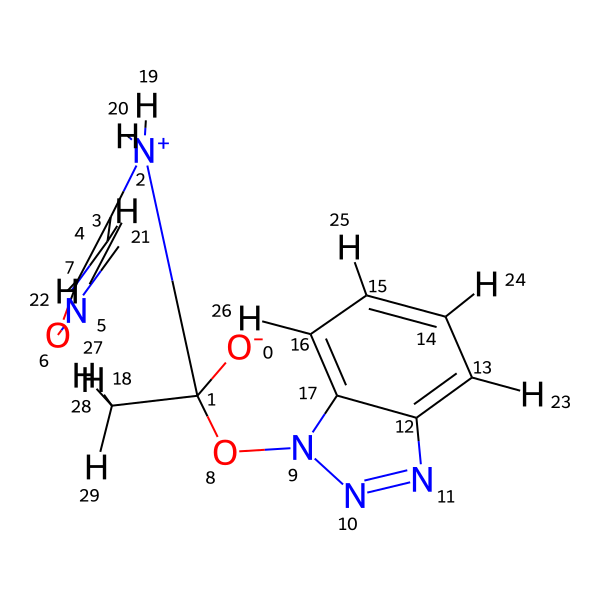

In [30]:
IPythonConsole.drawOptions.addAtomIndices = True
mol

In [ ]:
for atom in mol.GetAtoms(a):
    atom.GetIdx()

In [13]:
os.chdir('/home/ergot/linux_qm/notebooks')

In [20]:
cclib.io.ccread('.xtb_tmp/output').converged_geometries

INFO:cclib:Identified logfile to be in XTB format


array([[[-1.85427998e-01, -1.59068268e-04, -3.17867056e-03],
        [-5.07353222e-01, -6.12626216e-01, -8.38921262e-01],
        [-5.21012036e-01,  1.02453064e+00, -1.24058659e-01],
        [-5.37950964e-01, -4.13248532e-01,  9.36130767e-01]]])

In [18]:
cclib.io.ccread('.xtb_tmp/output').atomcoords

INFO:cclib:Identified logfile to be in XTB format


array([[[-1.85427998e-01, -1.59068268e-04, -3.17867056e-03],
        [-5.07353222e-01, -6.12626216e-01, -8.38921262e-01],
        [-5.21012036e-01,  1.02453064e+00, -1.24058659e-01],
        [-5.37950964e-01, -4.13248532e-01,  9.36130767e-01]]])

In [24]:
cclib.io.ccread('.xtb_tmp/output').scfenergies[-1]

INFO:cclib:Identified logfile to be in XTB format


-210.76602940928353

In [17]:
cclib.io.ccread('.xtb_tmp/output').atomnos

INFO:cclib:Identified logfile to be in XTB format


array([ 6, 35,  1,  1,  1], dtype=int32)

In [293]:
data.atomnos.shape[0], data.atomcoords[-1].shape[0]

(5, 5)

False

42

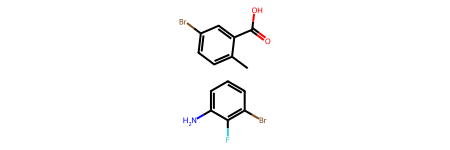

In [18]:
Chem.MolFromSmiles('Nc1cccc(Br)c1F.Cc1ccc(Br)cc1C(=O)O')

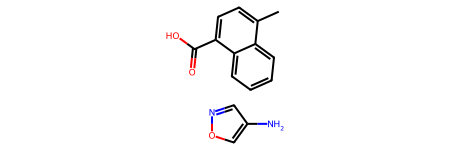

In [20]:
Chem.MolFromSmiles('N[C@H](CO)c1ccccc1.O=C(O)Cc1cccc(F)c1')
Chem.MolFromSmiles('Nc1cnoc1.Cc1ccc(C(=O)O)c2ccccc12')